# Chapter 5, Example 5

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.datasets.mnist as mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
batch_size = 128
num_classes = 10
no_epochs = 30

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu'),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.times=[]
    def on_train_batch_begin(self, batch, logs={}):
        self.starttime = time.time()
    def on_train_batch_end(self, batch, logs={}):
        self.times.append(time.time()-self.starttime)

cb = TimingCallback()

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=2,
                    use_multiprocessing=True,
                    callbacks = [cb],
                    validation_data=(x_test, y_test))

Epoch 1/30
469/469 - 4s - loss: 1.0573 - accuracy: 0.7616 - val_loss: 0.4975 - val_accuracy: 0.8778
Epoch 2/30
469/469 - 3s - loss: 0.4314 - accuracy: 0.8879 - val_loss: 0.3568 - val_accuracy: 0.9024
Epoch 3/30
469/469 - 3s - loss: 0.3474 - accuracy: 0.9042 - val_loss: 0.3103 - val_accuracy: 0.9137
Epoch 4/30
469/469 - 3s - loss: 0.3091 - accuracy: 0.9130 - val_loss: 0.2814 - val_accuracy: 0.9203
Epoch 5/30
469/469 - 3s - loss: 0.2835 - accuracy: 0.9194 - val_loss: 0.2620 - val_accuracy: 0.9279
Epoch 6/30
469/469 - 3s - loss: 0.2640 - accuracy: 0.9253 - val_loss: 0.2472 - val_accuracy: 0.9319
Epoch 7/30
469/469 - 3s - loss: 0.2477 - accuracy: 0.9305 - val_loss: 0.2343 - val_accuracy: 0.9352
Epoch 8/30
469/469 - 3s - loss: 0.2339 - accuracy: 0.9340 - val_loss: 0.2225 - val_accuracy: 0.9371
Epoch 9/30
469/469 - 3s - loss: 0.2217 - accuracy: 0.9377 - val_loss: 0.2123 - val_accuracy: 0.9401
Epoch 10/30
469/469 - 3s - loss: 0.2108 - accuracy: 0.9412 - val_loss: 0.2036 - val_accuracy: 0.9433

In [7]:
print('time for a weight update: %g s'%np.average(cb.times))

time for a weight update: 0.00484098 s


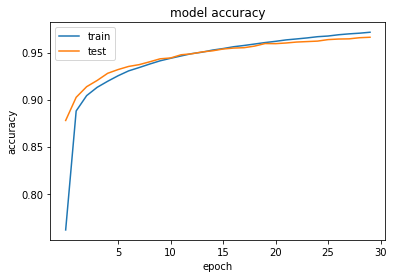

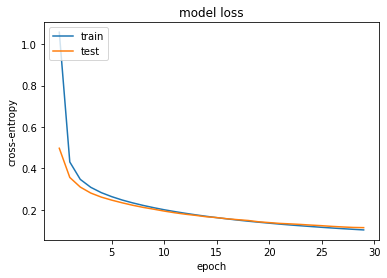

In [8]:
# summarize history for accuracy
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30])
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/5.5a_1.png')

# summarize history for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30])
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/5.5a_2.png')